In [5]:
!pip install -q fastbook

In [7]:
from fastai.vision.all import *

import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


# 1. Data loading and augmentation

Create a DataBlock and DataLoaders using:
- Training and validation images collected in dl-lab2
- `Resize(420)` as item transform
- A size of 224 in the batch transforms
- Use `set_seed()` to obtain reproducible results.
- Augmentations using `aug_transforms()` with `min_scale` and `mult` set to a value that creates resonable augmentations (see question 1)

Show a training and a validation batch.
Show augmentations, i.e. `show_batch()` with `unique=True`.

In [9]:
export_path = Path('/content/gdrive/MyDrive/Colab Notebooks/')
export_path.ls()
path = export_path/'digits'


In [10]:
set_seed(440,True)
digits = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(),
                 get_y=parent_label,
                 item_tfms=Resize(size = 420),
                 batch_tfms=aug_transforms(size=224, p_lighting = 1, min_scale=1.5, mult = 0.25)) 
dls = digits.dataloaders(path)

print(dls)

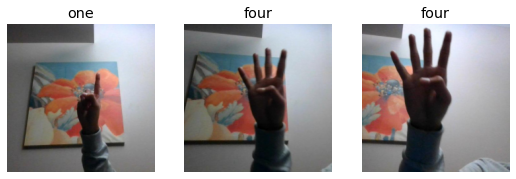

In [11]:
dls.train.show_batch(nrows = 1, ncols = 3)

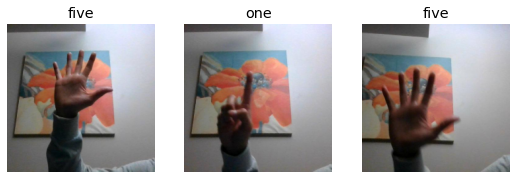

In [12]:
dls.valid.show_batch(nrows = 1, ncols = 3)

### Question 1: Which `min_scale` and `mult` values did you choose for augmentations? Can you spot any problems in the training set augmentations, e.g. finger digits missing?
I used min_scale = 1.5 and mult = 0.25 because when running through smaller min_scale and higher mult, the validation set of 5 is out of frame. 


# 2. Train the classifier

## 2.1 Impact of learning rate
With:
- Same `set_seed()` as above
- Re-creating the same DataLoaders as above
- ResNet18 architecture.
- accuracy as metric.

Use the learning rate finder and identify three learning rates:
- small: In the flat region prior to descending
- medium: What the textbook would recommend
- large: Close to the minimum of the learning rate finder

Train the model with each learning rate using `fine_tune` with 15 epochs


In [15]:
set_seed(440,True)
digits = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(),
                 get_y=parent_label,
                 item_tfms=Resize(size = 420),
                 batch_tfms=aug_transforms(size=224, p_lighting = 1, min_scale=1.5, mult = 0.25)) 
dls = digits.dataloaders(path)

learn = vision_learner(dls, resnet18, metrics=accuracy)


Minimum/10:	1.45e-02
Steepest point:	2.51e-03
Longest valley:	1.74e-03
Slide interval:	1.74e-03


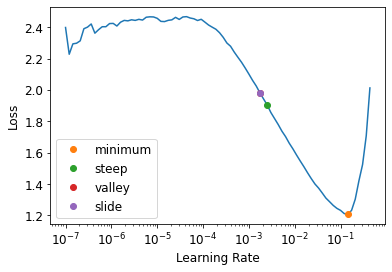

In [16]:
lr_min, lr_steep, lr_valley, lr_slide = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))
print(f"Minimum/10:\t{lr_min:.2e}")
print(f"Steepest point:\t{lr_steep:.2e}")
print(f"Longest valley:\t{lr_valley:.2e}")
print(f"Slide interval:\t{lr_slide:.2e}")

### Question 2: Which training run resulted in the best model? State final accuracy values for all learning rates and identify the best model. 
*YOUR ANSWER HERE*


### Question 3: Did any models overfit? Include your reasoning. 
*YOUR ANSWER HERE*


## 2.2 Impact of freeze epoch
With:
- Same `set_seed()` as above
- Re-creating the same DataLoaders as above
- ResNet18 architecture.
- accuracy as metric.
- learning rate of the best model from above

Create three model training with `fine_tune()` that use different combinations of `freeze_epochs` and `epochs` with the total number of epochs not exceeding 16 (number of epochs from the previous section).

### Question 4: Did any of these models outperform the models in Section 2.1? State final accuracy values for epoch combinations and identify the best model, compare to best model in section 2.1. 
*YOUR ANSWER HERE*


### Question 5: Did any models overfit? Include your reasoning. 
*YOUR ANSWER HERE*


# 3. Analyze model performance
- Retrain the best model from above.
- Plot the confusion matrix.
- Plot 10 top losses

### Question 6: With which finger digits does your model have the most problems with? 
*YOUR ANSWER HERE*


# 4. Save the best model to file
Save the model using `learn.export()` as `.pkl` file. Verify that the model can be reloaded and used to make predictions.

# 5. Summary and Conclusion

Summarize the best model:
- Training strategy: learning rate and epochs used.
- Accuracy achieved, summary of confusion matrix, i.e. what kind of errors does the model make.

*YOUR ANSWER HERE*


Conclusion:
- Are you satisfied with model performance? Why, why not?

*YOUR ANSWER HERE*


# 6.Reflection
Include a sentence or two about
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating

while working on this assignment.

*YOUR ANSWER HERE*
